## **Customer Segmentation Using Unsupervised Learning**

**Objective:**
Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.

**Dataset:**
Mall Customers Dataset

## **STEP 1: Load & Inspect Data**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Mall_Customers.csv")

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape


(200, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Dataset has 200 rows × 5 columns and No missing values.

Data types are appropriate:

Numerical: Age, Income, Spending.

Categorical: Gender.

Spending Score ranges from 1 to 99, confirming strong behavioral variation.

## **STEP 2: Exploratory Data Analysis (EDA)**

In [ ]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Dataset is clean, no preprocessing needed

## Gender Distribution

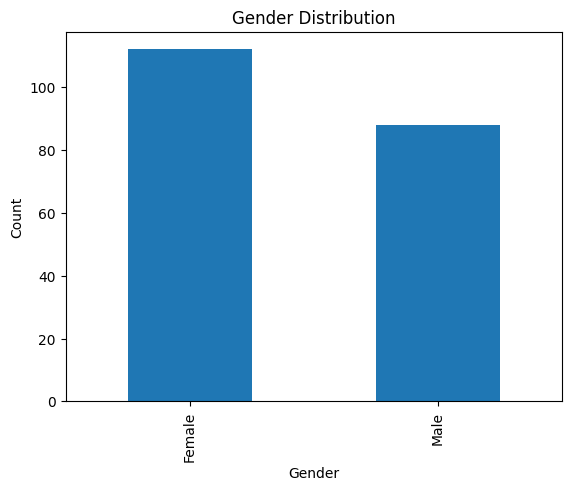

In [ ]:
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Slightly more females than males

Gender imbalance is minimal → clustering remains unbiased

## Age Distribution

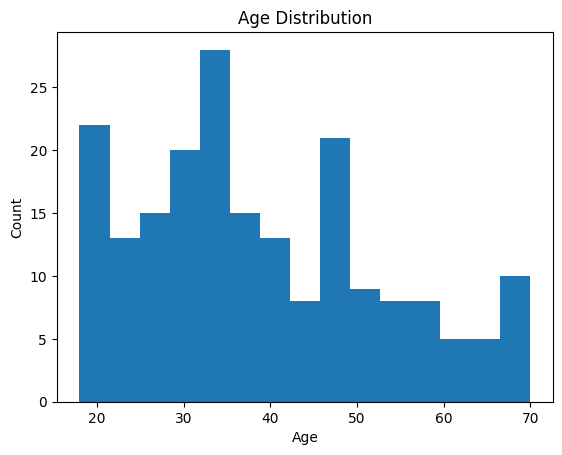

In [ ]:
plt.hist(df['Age'], bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Most customers are between 20–40 years

Fewer customers above 60

Younger customers dominate mall activity

## Annual Income vs Spending Score

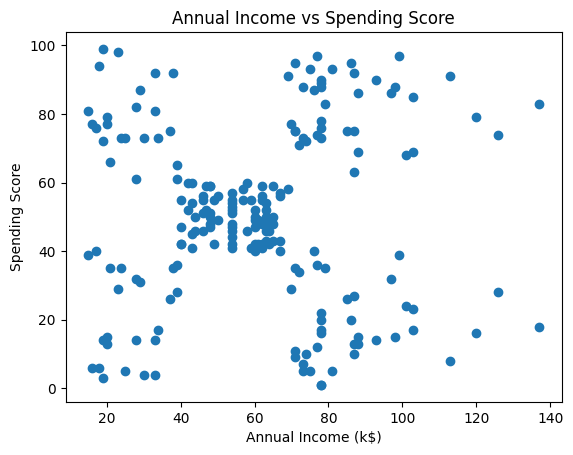

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()


Customers with similar income have very different spending scores

Income alone does not predict spending behavior

Justifies the need for clustering

## **STEP 3: Feature Selection for Clustering**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## **STEP 4: Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Prevents income dominance over spending score

## **STEP 5: Elbow Method (Find Optimal K)**

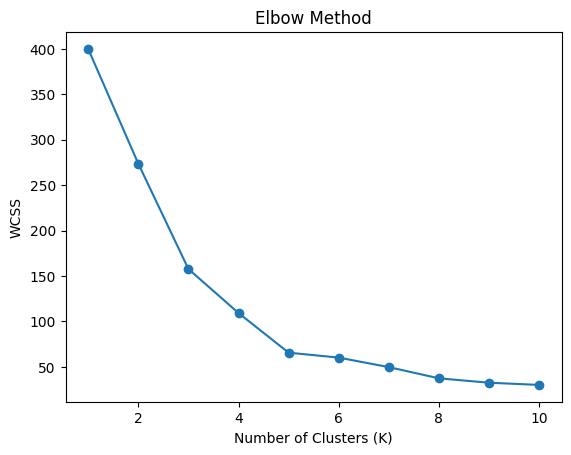

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


Clear bend at K = 5

Indicates optimal clustering

No over-segmentation

## **STEP 6: Apply K-Means Clustering**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Customers are now behaviorally grouped

Foundation for marketing strategies

### **STEP 7: Visualize Clusters (Original Features)**

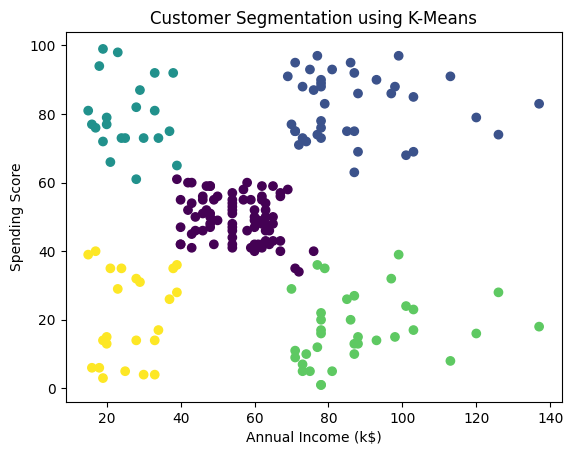

In [18]:
plt.scatter(
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster']
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Means")
plt.show()


Five visually distinct clusters

Clear separation between:

High spenders

Low spenders

Average customers

## **STEP 8: PCA for Cluster Visualization**

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


### PCA Cluster Plot

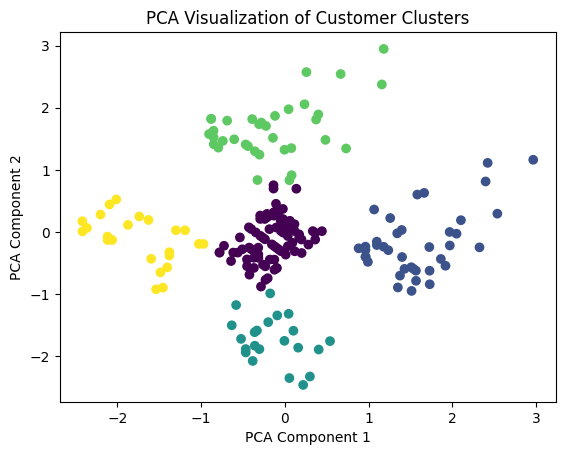

In [22]:
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'])
plt.title("PCA Visualization of Customer Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


PCA confirms clusters are not random

Strong separation validates K-Means results

Supports clustering stability

## **STEP 9: Cluster Analysis (Important for Report)**

In [21]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


High income – high spending → premium customers

High income – low spending → potential growth segment

Low income – high spending → deal-driven customers

Low income – low spending → minimal marketing spend

Moderate segment → cross-sell opportunity